# Datetime Library
Fun story time! Pandas started out in the financial world, which is why it's so great at everything related to timeseries.

Today, we're going to review datetime objects, look at timedeltas, generate basic timeseries plots, and calculate autocorrelation using python.



## Datetime Object

In [1]:
# The date time library is something you should already have because of Anaconda.
from datetime import datetime
# And quite a few of you are already familiar with

# Let's look at the date we once believed the world would end on.
lesson_date = datetime(2012, 12, 21, 12, 21, 12, 844089)


In [2]:
print "Micro-Second", lesson_date.microsecond
print "Second", lesson_date.second
print "Minute", lesson_date.minute
print "Hour", lesson_date.hour
print "Day", lesson_date.day
print "Month",lesson_date.month
print "Year", lesson_date.year


Micro-Second 844089
Second 12
Minute 21
Hour 12
Day 21
Month 12
Year 2012


## Timedelta
Say we want to add or subtract time to/from a date. Perhaps we're using time as an index and we want to get everything that happened a week before a specific observation, for example.

We can use a timedelta object to shift a Datetime object. Here's an example:

In [3]:
# Import timedelta from datetime library
from datetime import timedelta

# Time deltas represent time as an amount as opposed to a fixed position.
offset = timedelta(days=1, seconds=20)

# the time delta has attributes that allow us to extract values from it.
print 'offset days', offset.days
print 'offset seconds', offset.seconds
print 'offset microseconds', offset.microseconds

offset days 1
offset seconds 20
offset microseconds 0


In [4]:
now = datetime.now()
print "It's now: ", now

It's now:  2017-05-01 14:10:35.386906


In [5]:
print "Future: ", now + offset
print "Past: ", now - offset

Future:  2017-05-02 14:10:55.386906
Past:  2017-04-30 14:10:15.386906


_The largest value a time delta can hold is 'Days'.  I.e. you can't say you want you an offset to be 2 years, 44 days and 12 hours.  You would have to manually convert the time of those years to be represented in days._


In [6]:
# Get a dataset from the internets
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')

In [7]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [66]:
# We can see that the Time column is just an object.
ufo.dtypes

City                        object
Colors Reported             object
Shape Reported              object
State                       object
Time                datetime64[ns]
new                timedelta64[ns]
dtype: object

In [65]:
#Overwrite the original Time column with one that has been converted to a datetime series.
ufo['Time'] = pd.to_datetime(ufo.Time)

#Letting pandas guess how to do this can take a little bit of time we can use a few arguments to help.
# '''ufo['Time'] = pd.to_datetime(ufo.Time, format='%Y%m%d', errors='coerce')'''
# Format will let pandas know what format pandas should use to interpret the date as
# errors will allow you to automatically deal with errors when converting.

In [10]:
#the time column looks a bit different now!
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [11]:
#let's take a look at how the series has changed
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [12]:
# we can also use dt to get weekday names 
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [13]:
#and what day of the year it was!
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

#### Independent activity:
Take 10 minutes to look at the different ways you can work with timezones and timezone formatting. Try creating a few new columns for things like daylight savings adjustment, timezone name, etc.

https://docs.python.org/2/library/datetime.html

In [67]:
ufo

,City,Colors Reported,Shape Reported,State,Time,new
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,-23112 days +22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,-23083 days +20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,-22853 days +14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,-22747 days +13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,-22060 days +19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00,-21545 days +15:30:00
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00,-21272 days +00:00:00
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00,-20876 days +00:00:00
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00,-20784 days +17:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00,-20541 days +00:00:00


In [96]:
from pytz import timezone

ufo.set_index(ufo.Time,inplace=True)


# pd.to_datetime(ufo.Time, unit÷='ms').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
ufo.Time.dt.tz_localize('UTC')
ufo.Time.dt.tz_convert('US/Eastern')

TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

## Time Stamps

In [40]:
#let's create a timestamp of interest
ts = pd.to_datetime('9/10/1993')
#^that's the day x-files first came out, for all of you wondering
ts
# The main difference between a Datetime object and a timestamp is...
# that timestamps can be used as comparisions.

Timestamp('1993-09-10 00:00:00')

In [41]:
# Use the timestamp we just saved to create a new dataframe.
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
7190,Phoenix,NaN,RECTANGLE,AZ,1993-09-10 20:30:00
7191,Chicopee,NaN,TRIANGLE,MA,1993-09-10 22:30:00
7192,Milan,NaN,TRIANGLE,OH,1993-09-11 21:11:00
7193,Yuma,NaN,TRIANGLE,AZ,1993-09-13 21:30:00
7194,Toledo,ORANGE BLUE,OVAL,OH,1993-09-14 21:00:00


In [42]:
#we could create a new column looking at how far away from our point of interest a particular UFO was sighted
ufo['new'] = ufo.Time - ts

In [43]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,new
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,-23112 days +22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,-23083 days +20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,-22853 days +14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,-22747 days +13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,-22060 days +19:00:00


In [44]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time,new
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2669 days 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2669 days 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,2669 days 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2669 days 23:45:00
18240,Ybor,NaN,OVAL,FL,2000-12-31 23:59:00,2669 days 23:59:00


In [45]:
# Timedelta can also be used to get the min and max of a timeseries.
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

You can also use timedelta to mess around with the silly YouTube videos you're embedding in a notebook

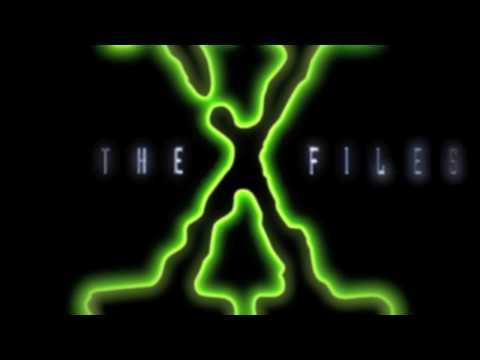

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo("hAAlDoAtV7Y")

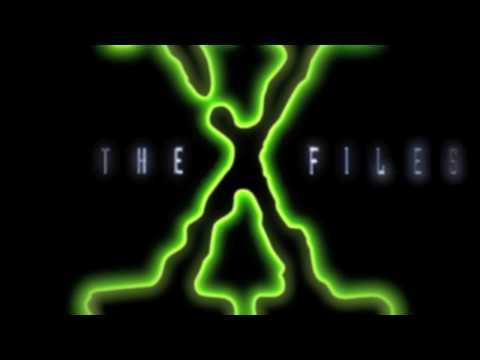

In [47]:
start=int(timedelta(minutes=1, seconds=2).total_seconds())
YouTubeVideo("hAAlDoAtV7Y", start=start, autoplay=1, theme="light", color="red")

#### More independent work: 

Search for .dt. on http://pandas.pydata.org/pandas-docs/stable/api.html for more information about pandas Datetime.

## Plotting a timeseries using pandas

In [74]:
#let's load in a different dataset
crime = pd.read_csv('https://raw.githubusercontent.com/rufuspollock/crime-data-sf/gh-pages/data/sfpd_incidents_march_2012.tidied.csv')

In [75]:
#taking a look at our different types
crime.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
dtype: object

In [76]:
#so do we want to mess around with the date or the time?
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,120168291,NON-CRIMINAL,COURTESY REPORT,Thursday,03/01/2012 08:00 AM +0000,06:50,TENDERLOIN,NONE,0 Block of JONES ST,-122.412120,37.780904,"37.7809035011582, -122.412119695795"
1,120170901,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,03/01/2012 08:00 AM +0000,00:10,TENDERLOIN,NONE,300 Block of MASON ST,-122.409737,37.787152,"37.7871515174923, -122.409736977824"
2,120170917,ASSAULT,INFLICT INJURY ON COHABITEE,Thursday,03/01/2012 08:00 AM +0000,00:01,INGLESIDE,"ARREST, BOOKED",0 Block of 30TH ST,-122.422691,37.742298,"37.742298340459, -122.422690779386"
3,120170945,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Thursday,03/01/2012 08:00 AM +0000,01:00,TENDERLOIN,"ARREST, CITED",POWELL ST / ELLIS ST,-122.407854,37.785492,"37.7854922044602, -122.407854234538"
4,120170951,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Thursday,03/01/2012 08:00 AM +0000,00:29,RICHMOND,NONE,800 Block of GREAT HY,-122.511137,37.772922,"37.7729219403249, -122.511137153422"


In [77]:
#let's turn date into a datetime object
crime['Date'] = pd.to_datetime(crime.Date)

In [78]:
crime.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
9531,126049132,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,2012-03-21 07:00:00,23:25,MISSION,NONE,15TH ST / FOLSOM ST,-122.415464,37.766937,"37.7669370292874, -122.415464372874"
9532,126049148,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,2012-03-22 07:00:00,19:00,MISSION,NONE,100 Block of CHATTANOOGA ST,-122.426570,37.753858,"37.7538576053338, -122.426569974378"
9533,126049160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Tuesday,2012-03-20 07:00:00,20:00,MISSION,NONE,600 Block of CHURCH ST,-122.428488,37.761196,"37.7611960721483, -122.428488113841"
9534,126051739,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,2012-03-17 07:00:00,20:00,CENTRAL,NONE,COLUMBUS AV / GREEN ST,-122.409017,37.799488,"37.7994880717633, -122.409017007613"
9535,129000260,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Thursday,2012-03-29 07:00:00,10:12,TARAVAL,NONE,CRESPI DR / 19TH AV,-122.475223,37.720442,"37.7204418078734, -122.475223128467"


In [79]:
#I'm arbitrarily picking weekday to be how we look at our data
crime['weekday'] = crime.Date.dt.weekday

In [80]:
#let's groupby weekday on this 
crime_ts = crime.groupby('weekday').aggregate(len)['IncidntNum']
#the groupby statement automatically makes weekday the index

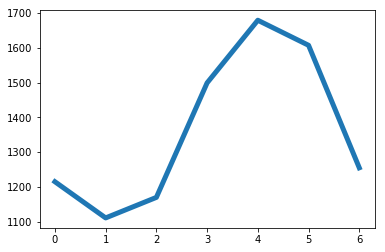

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(crime_ts.index, crime_ts.values, lw=5)
#LW = line width!
#a small stringed instrument! a classical timeseries!

In [82]:
#let's convert the date to be the index
crime.set_index('Date', inplace=True)

In [83]:
crime['Month'] = crime.index.month
crime['weekday'] = crime.index.weekday

In [84]:
#an FYI-- filtering by date becomes really easy when you're working with it as an index!
crime['2012-03-04']

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location,weekday,Month
Date,,,,,,,,,,,,,
2012-03-04 08:00:00,120179969,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,00:50,BAYVIEW,"ARREST, BOOKED",1800 Block of OAKDALE AV,-122.395592,37.737542,"37.7375417306786, -122.395592230657",6,3
2012-03-04 08:00:00,120179163,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,18:20,BAYVIEW,"ARREST, CITED",600 Block of MISSOURI ST,-122.396058,37.757488,"37.7574877714062, -122.396058047105",6,3
2012-03-04 08:00:00,120179969,OTHER OFFENSES,CONSPIRACY,Sunday,00:50,BAYVIEW,"ARREST, BOOKED",1800 Block of OAKDALE AV,-122.395592,37.737542,"37.7375417306786, -122.395592230657",6,3
2012-03-04 08:00:00,120179969,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Sunday,00:50,BAYVIEW,"ARREST, BOOKED",1800 Block of OAKDALE AV,-122.395592,37.737542,"37.7375417306786, -122.395592230657",6,3
2012-03-04 08:00:00,120179969,OTHER OFFENSES,RESISTING ARREST,Sunday,00:50,BAYVIEW,"ARREST, BOOKED",1800 Block of OAKDALE AV,-122.395592,37.737542,"37.7375417306786, -122.395592230657",6,3
2012-03-04 08:00:00,120180041,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,01:30,SOUTHERN,"ARREST, CITED",7TH ST / MARKET ST,-122.412515,37.780478,"37.7804777480508, -122.412515341356",6,3
2012-03-04 08:00:00,120180182,OTHER OFFENSES,PAROLE VIOLATION,Sunday,02:48,SOUTHERN,"ARREST, BOOKED",10TH ST / HOWARD ST,-122.414371,37.774042,"37.7740418385041, -122.414370627495",6,3
2012-03-04 08:00:00,120180182,OTHER OFFENSES,PROBATION VIOLATION,Sunday,02:48,SOUTHERN,"ARREST, BOOKED",10TH ST / HOWARD ST,-122.414371,37.774042,"37.7740418385041, -122.414370627495",6,3
2012-03-04 08:00:00,120180251,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,02:50,NORTHERN,NONE,MARINA BL / LAGUNA ST,-122.432073,37.805222,"37.8052217044166, -122.432073077885",6,3


In [85]:
#including looking at a range of observations
crime['3/3/2012':'3/4/2012']

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location,weekday,Month
Date,,,,,,,,,,,,,
2012-03-03 08:00:00,120177117,OTHER OFFENSES,RESISTING ARREST,Saturday,00:16,INGLESIDE,"ARREST, CITED",1500 Block of SUNNYDALE AV,-122.416011,37.711953,"37.711953339438, -122.416011450167",5,3
2012-03-03 08:00:00,120177117,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Saturday,00:16,INGLESIDE,"ARREST, CITED",1500 Block of SUNNYDALE AV,-122.416011,37.711953,"37.711953339438, -122.416011450167",5,3
2012-03-03 08:00:00,120177167,DRUG/NARCOTIC,POSSESSION OF COCAINE,Saturday,00:29,CENTRAL,"ARREST, BOOKED",400 Block of BROADWAY ST,-122.404701,37.798150,"37.7981503418686, -122.404700886186",5,3
2012-03-03 08:00:00,120177167,OTHER OFFENSES,PROBATION VIOLATION,Saturday,00:29,CENTRAL,"ARREST, BOOKED",400 Block of BROADWAY ST,-122.404701,37.798150,"37.7981503418686, -122.404700886186",5,3
2012-03-03 08:00:00,120177173,OTHER OFFENSES,TRAFFIC VIOLATION,Saturday,00:46,TARAVAL,"ARREST, CITED",TARAVAL ST / 26TH AV,-122.483190,37.742718,"37.7427177681108, -122.483190343565",5,3
2012-03-03 08:00:00,120177242,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,00:49,CENTRAL,"ARREST, BOOKED",BROADWAY ST / COLUMBUS AV,-122.406670,37.797864,"37.7978641744394, -122.406669739951",5,3
2012-03-03 08:00:00,120177242,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Saturday,00:49,CENTRAL,"ARREST, BOOKED",BROADWAY ST / COLUMBUS AV,-122.406670,37.797864,"37.7978641744394, -122.406669739951",5,3
2012-03-03 08:00:00,120177305,ASSAULT,BATTERY,Saturday,01:20,SOUTHERN,"ARREST, BOOKED",9TH ST / MISSION ST,-122.414714,37.776231,"37.7762310404758, -122.414714295579",5,3
2012-03-03 08:00:00,120177305,LARCENY/THEFT,GRAND THEFT FROM PERSON,Saturday,01:20,SOUTHERN,"ARREST, BOOKED",9TH ST / MISSION ST,-122.414714,37.776231,"37.7762310404758, -122.414714295579",5,3


## Quick intro to autocorrelation and window functions

In [97]:
#load data!
url = 'https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/rossmann.csv'
data = pd.read_csv(url, skipinitialspace=True)
import seaborn as sns

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [99]:
# Most interested in date - format properly and convert to index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [100]:
# create new columns for year and month 
data['Year'] = data.index.year
data['Month'] = data.index.month

data.head() 

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [101]:
# There are over a million sales data points in this dataset, so for some simple EDA we will focus on just one store.
store1_data = data[data.Store == 1]
store1_data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


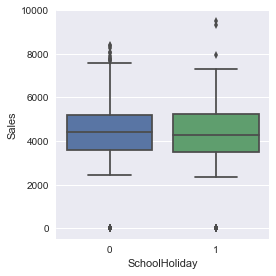

In [102]:
'''
As we begin to study the sales from this drugstore, we also want to know both the time dependent elements of sales as 
well as whether promotions or holidays effected these sales. To start, we can compare the average sales on those events.
To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of 
sales on holidays against all other days. On state holidays the store is closed (which means there are 0 sales), and 
on school holidays the sales are relatively similar. These types of insights represent the contextual knowledge needed 
to truly explain time series phenomenon. Can you think of any other special considerations we should make when tracking sales?
'''

# check similarity between School Holiday and Sales
sns.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data,
    kind='box'
)

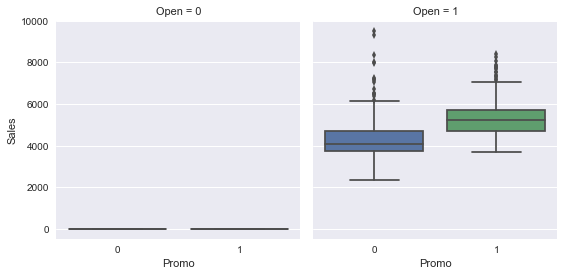

In [103]:
#  We can see that there is a difference in sales on promotion days
sns.factorplot(
    col='Open',
    x='Promo',
    y='Sales',
    data=store1_data,
    kind='box'
)

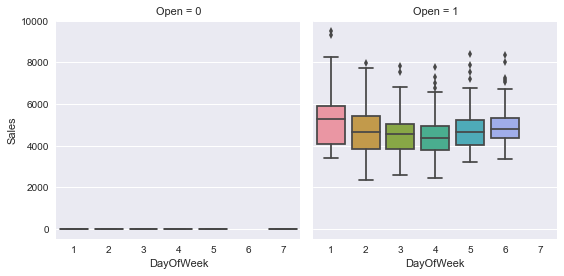

In [104]:
'''
Why is it important to separate out days where the store is closed? 
Because there aren't any promotions on those days either, so including 
them will bias your sales data on days without promotions! Remember: 
Data Scientists needs to think about the business logic (context) as well as 
analyzing the raw data.
'''

# perhaps plot sales across day of the week
sns.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
)


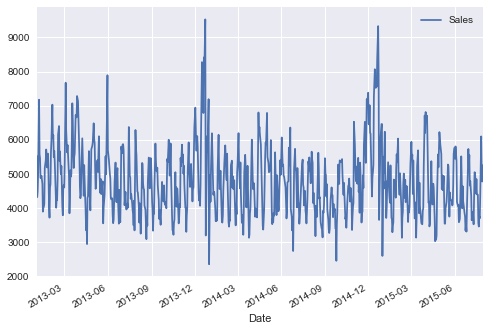

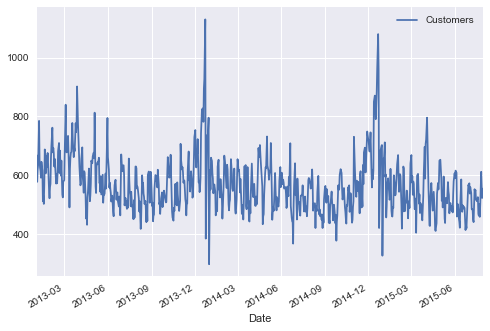

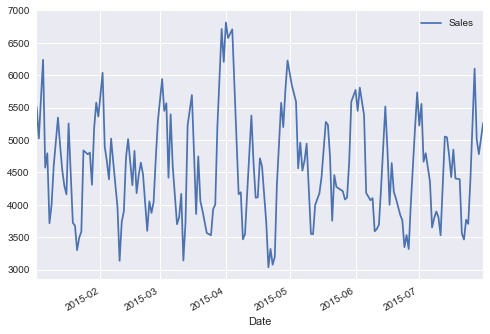

In [105]:
# Consider sales across multiple years. How did sales change from 2014 to 2015?

# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()          # sales over time
store1_open_data[['Customers']].plot()      # customers over time

# EXERCISE: Use filtering to show the trend in 2015 alone

store1_data_2015 = store1_data['2015']
store1_data_2015[
    store1_data_2015.Open==1
][['Sales']].plot()


#### Check:

What is autocorrelation?

Autocorrelation features measure the statistical correlation of a time series with a _lagged_ version of itself.

In [106]:
'''
Computing Autocorrelation
To measure how much the sales are correlated with each other, we want to compute 
the autocorrelation of the 'Sales' column. In pandas, we'll do this with the 
autocorr function.
autocorr takes one argument, the lag - which is how many prior data points 
should be used to compute the correlation. If we set the lag to 1, we compute 
the correlation between every point and the point directly preceding it, 
If we set lag to 10, this computes the correlation between every point 
and the point 10 days earlier:
'''

data['Sales'].resample('D').mean().autocorr(lag=1)

-0.025858276006383577

In [107]:
#that's a pretty small mean correlation. what if we look at the autocorrelation for 30 days
data['Sales'].resample('D').mean().autocorr(lag=30)

-0.12984245822530618

In [108]:
'''
If we want to investigate trends over time in sales, as always, we will 
start by computing simple aggregates. We want to know: what were the mean 
and median sales in each month and year?
In Pandas, this is performed using the resample command, which is very 
similar to the groupby command. It allows us to group over different 
time intervals.
We can use data.resample and provide as arguments: - The level on 
which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' 
for year - The aggregation to perform: 'mean', 'median', 'sum', etc.
'''

# Here we can see again that December 2013 and 2014 were the highest average sale months.
data[['Sales']].resample('A').mean()

,Sales
Date,
2013-12-31,5658.533675
2014-12-31,5833.290704
2015-12-31,5878.245380


In [109]:
data.resample('A').mean()    # whole dataframe

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month
Date,,,,,,,,,
2013-12-31,557.998943,3.994525,5658.533675,629.043686,0.830380,0.369864,0.188774,2013.0,6.526041
2014-12-31,559.170379,3.998462,5833.290704,643.268034,0.830314,0.381913,0.186201,2014.0,6.263043
2015-12-31,558.000000,4.004717,5878.245380,624.199843,0.829309,0.400943,0.149264,2015.0,4.018868


In [110]:
data[['Sales']].resample('M').mean() 

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383
2013-06-30,5402.162960
2013-07-31,6042.062260
2013-08-31,5729.574049
2013-09-30,5322.988430


In [111]:
# Resample to have the daily total over all stores
# Alternatively, this could a daily average over all store with how='mean'
daily_store_sales = data[['Sales']].resample('D').mean()
daily_store_sales

,Sales
Date,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570
2013-01-06,129.061883
2013-01-07,9710.177578
2013-01-08,7847.028700
2013-01-09,6947.626009


In [126]:
# CHECK: What is a rolling mean? Why might it be useful?

# 3-day rolling mean of daily store sales
daily_store_sales.rolling(window=3, center=True)
daily_store_sales.rolling(window=3, center=True)   # filter to 2015 only
daily_store_sales.rolling(window=10, center=True)   # plot


Rolling [window=10,center=True,axis=0]

In [113]:
# We can also use exponential moving average. CHECK: What is the difference?
pd.ewma(data['Sales'], span=10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=0,adjust=True).mean()
  from ipykernel import kernelapp as app


Date
2015-07-31    5.263000e+03
2015-07-31    5.703550e+03
2015-07-31    6.752934e+03
2015-07-31    9.138872e+03
2015-07-31    7.899615e+03
2015-07-31    7.315572e+03
2015-07-31    9.250101e+03
2015-07-31    9.077629e+03
2015-07-31    8.966099e+03
2015-07-31    8.591968e+03
2015-07-31    8.972971e+03
2015-07-31    8.970180e+03
2015-07-31    8.940900e+03
2015-07-31    8.477164e+03
2015-07-31    8.613681e+03
2015-07-31    8.920096e+03
2015-07-31    8.827947e+03
2015-07-31    9.060227e+03
2015-07-31    8.906611e+03
2015-07-31    9.033706e+03
2015-07-31    9.122527e+03
2015-07-31    8.652012e+03
2015-07-31    8.398776e+03
2015-07-31    9.460323e+03
2015-07-31    1.032417e+04
2015-07-31    9.866019e+03
2015-07-31    1.047727e+04
2015-07-31    9.897665e+03
2015-07-31    9.808917e+03
2015-07-31    8.891612e+03
                  ...     
2013-01-01    9.384395e-10
2013-01-01    7.678142e-10
2013-01-01    6.282116e-10
2013-01-01    5.139913e-10
2013-01-01    4.205383e-10
2013-01-01    3.440768e

In [114]:
'''
WINDOW FUNCTIONS
Pandas rolling_mean and rolling_median are only two examples of Pandas
window function capabilities. Window functions operate on a set of N
consecutive rows (i.e.: a window) and produce an output.
n addition to rolling_mean and rolling_median, there are rolling_sum,
rolling_min, rolling_max... and many more.
Another common one is diff, which takes the difference over time.
pd.diff takes one argument: periods, which measures how many rows
prior to use for the difference.
For example, if we want to compute the difference in sales,
day by day, we could compute:
'''

daily_store_sales.diff(periods=1) # day by day difference in sales
daily_store_sales.diff(periods=7) # compare same day each week

# Difference functions allow us to identify seasonal changes when we see repeated up or downswings.
# An example from FiveThirtyEight:
# http://i2.wp.com/espnfivethirtyeight.files.wordpress.com/2015/03/casselman-datalab-wsj2.png?quality=90&strip=all&w=575&ssl=1

,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
2013-01-07,NaN
2013-01-08,7759.744139
2013-01-09,714.595516


In [115]:
'''
Pandas Expanding Functions
In addition to the set of rolling_* functions, Pandas also 
provides a similar collection of expanding_* functions, which, 
instead of using a window of N values, uses all values up until 
that time.
'''


pd.expanding_mean(daily_store_sales) # average date from first till last date specified
pd.expanding_sum(daily_store_sales) # sum of average sales per store until that date

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.expanding_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.expanding(min_periods=1).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.expanding_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.expanding(min_periods=1).sum()


,Sales
Date,
2013-01-01,8.728456e+01
2013-01-02,6.320315e+03
2013-01-03,1.201343e+04
2013-01-04,1.796765e+04
2013-01-05,2.330540e+04
2013-01-06,2.343446e+04
2013-01-07,3.314464e+04
2013-01-08,4.099167e+04
2013-01-09,4.793929e+04


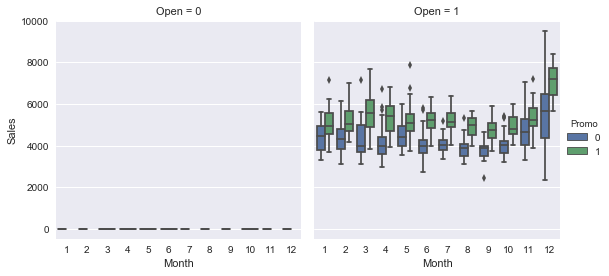

In [116]:
'''
EXERCISES
1. Plot the distribution of sales by month and compare the effect of promotions.
hint: try using hue in sns
2. Are sales more correlated with the prior date, a similar date last year, or a similar date last month?
4. Identify the date with largest drop in sales from the same date in the previous week.
5. Compute the total sales up until Dec. 2014.
6. When were the largest differences between 15-day moving/rolling averages? HINT: Using rolling_mean and diff
'''

# Plot the distribution of sales by month and compare the effect of promotions
sns.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_data,
    kind='box'
)


In [117]:
# Are sales more correlated with the prior date, a similar date last year, or a similar date last month?
# Compare the following:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

print average_daily_sales['Sales'].autocorr(lag=1)        # day

print average_daily_sales['Sales'].autocorr(lag=30)       # month  

average_daily_sales['Sales'].autocorr(lag=365)      # year


-0.0258582760064
-0.129842458225


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


0.020238529448344551

In [118]:
# Identify the date with largest drop in average store sales from the same date in the previous month:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

average_daily_sales.sort(['DiffVsLastWeek']).head

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<bound method DataFrame.head of                    Sales      Open  DiffVsLastWeek
Date                                              
2015-04-06    244.772197  0.028700   -10850.701345
2013-12-25    127.878924  0.015247   -10804.564126
2013-12-26    169.145291  0.017040   -10360.247534
2014-12-25    166.188235  0.017112   -10323.878075
2014-04-21    216.132735  0.028700   -10262.018834
2014-06-09    258.458296  0.030493   -10201.351570
2014-12-26    219.505882  0.020321    -9960.696257
2015-05-25    268.585650  0.029596    -9241.046637
2013-04-01    216.211659  0.027803    -9185.183857
2013-05-09    209.161435  0.026906    -8655.745291
2013-05-20    227.745291  0.029596    -8585.255605
2015-05-14    259.414350  0.028700    -7409.299552
2013-03-29    191.857399  0.014350    -7203.651121
2013-12-24   4693.101345  1.000000    -7014.515695
2014-05-29    262.111211  0.027803    -6480.304036
2013-10-03    256.069955  0.035874    -6460.807175
2013-05-01    180.243946  0.016143    -6257.182063

In [119]:
# Unsurprisingly, this day is Dec. 25 and Dec. 26 in 2014 and 2015, when the store is closed and there are many sales in the preceding week. How about when the store is open?
average_daily_sales[average_daily_sales.Open == 1].sort(['DiffVsLastWeek'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Sales,Open,DiffVsLastWeek
Date,,,
2013-12-24,4693.101345,1.0,-7014.515695
2014-12-24,4933.386096,1.0,-5209.272727
2013-12-09,6822.938117,1.0,-4811.537220
2013-10-14,5893.636771,1.0,-4027.798206
2015-04-20,5909.294170,1.0,-4023.443049
2014-12-08,7016.058824,1.0,-3975.354011
2014-12-29,7798.316578,1.0,-3974.561497
2015-06-08,6606.978475,1.0,-3925.411659
2015-04-08,6090.268161,1.0,-3866.709417


In [120]:
# Compute the total sales up until Dec. 2014:
total_daily_sales = data[['Sales']].resample('D', how='sum')
pd.expanding_sum(total_daily_sales)['2014-12']
# THIS IS NOT pd.expanding_sum(data['Sales'])['2014-12']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.expanding_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.expanding(min_periods=1).sum()
  app.launch_new_instance()


,Sales
Date,
2014-12-01,4.291837e+09
2014-12-02,4.300681e+09
2014-12-03,4.308939e+09
2014-12-04,4.317493e+09
2014-12-05,4.327295e+09
2014-12-06,4.333774e+09
2014-12-07,4.333971e+09
2014-12-08,4.340531e+09
2014-12-09,4.346861e+09


In [121]:
# When were the largest differences between 15-day moving/rolling averages? HINT: Using rolling_mean and diff
pd.rolling_mean(total_daily_sales, window=15).diff(1).sort('Sales')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Sales
Date,
2014-01-01,-8.623923e+05
2013-12-31,-7.392456e+05
2014-01-05,-6.653641e+05
2014-05-01,-6.524515e+05
2015-01-01,-6.235483e+05
2015-05-14,-6.152304e+05
2013-04-14,-6.131841e+05
2015-04-19,-6.086144e+05
2015-05-17,-5.672869e+05


#### Programming note on using time series for Capstones:

Here's an example of using timeseries for a Capstone: https://github.com/samuel-stack/Portfolio/blob/master/Moving%20Violations%20VS.%20Speed%20Traps/Granger%20Causality%20test%20.ipynb

Note, this Capstone makes use of Granger Causality: a statistical concept that says if a signal X "Granger-causes" (or "G-causes") a signal Y, then past values of X should contain information that helps predict Y above and beyond the information contained in past values of Y alone. 

To put it another way, a time series X1 is said to Granger-cause Y if the X1 values provide statistically significant information about future values of Y. 